Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Support vector machines: Problem solving

This exercise uses the `baseball` dataset, which contains Major League Baseball data from 1986 and 1987.

The goal is to predict `Division` (E: East or W: West) using all the other variables.

| Variable  | Type    | Description                                                                      |
|:-----------|:---------|:----------------------------------------------------------------------------------|
| AtBat     | Ratio   | Number of times at bat in 1986                                                   |
| Hits      | Ratio   | Number of hits in 1986                                                           |
| HmRun     | Ratio   | Number of home runs in 1986                                                      |
| Runs      | Ratio   | Number of runs in 1986                                                           |
| RBI       | Ratio   | Number of runs batted in in 1986                                                 |
| Walks     | Ratio   | Number of walks in 1986                                                          |
| Years     | Ratio   | Number of years in the major leagues                                             |
| CAtBat    | Ratio   | Number of times at bat during his career                                         |
| CHits     | Ratio   | Number of hits during his career                                                 |
| CHmRun    | Ratio   | Number of home runs during his career                                            |
| CRuns     | Ratio   | Number of runs during his career                                                 |
| CRBI      | Ratio   | Number of runs batted in during his career                                       |
| CWalks    | Ratio   | Number of walks during his career                                                |
| League    | Nominal | A factor with levels A and N indicating player's league at the end of 1986       |
| Division  | Nominal | A factor with levels E and W indicating player's division at the end of 1986     |
| PutOuts   | Ratio   | Number of put outs in 1986                                                       |
| Assists   | Ratio   | Number of assists in 1986                                                        |
| Errors    | Ratio   | Number of errors in 1986                                                         |
| Salary    | Ratio   | 1987 annual salary on opening day in thousands of dollars                        |
| NewLeague | Nominal | A factor with levels A and N indicating player's league at the beginning of 1987 |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>

## Load data

Import `pandas` so we can load a dataframe.

In [33]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe with `datasets/baseball.csv`.

In [34]:
dataframe = pd.read_csv('datasets/baseball.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="63" y="65"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="-)GQvCE!6^o;dmIQg8(#"><field name="TEXT">datasets/baseball.csv</field></block></value></block></value></block><block type="variables_get" id=":tK~O?w5j~Ku:s2cnVd7" x="75" y="232"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Explore data

To remove missing values `dropna` and store the results back into your dataframe.

In [35]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


------------------
**QUESTION:**

How many rows had NaN?

**ANSWER: (click here to edit)**

*322-263=59*

-------------------

To get the five figure summary, `describe` the dataframe.

In [36]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


To visualize relationships amongst variables, first import `plotly.express`.

In [37]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And create a correlation matrix.

In [38]:
corr = dataframe.corr(numeric_only=True)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":6px:i2yT#@tPaj$vnGs">corr</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="Ee8}_l^4K`Iijk:}CqNh" x="321" y="355"><field name="VAR" id=":6px:i2yT#@tPaj$vnGs">corr</field><value name="VALUE"><block type="varDoMethod" id="`A{@A;VWyavc)M}/z2~E"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="AT*jNs/MS,j%Mf@Y=.eA"><field name="CODE">numeric_only=True</field></block></value></block></value></block></xml>

And show a correlation heatmap with row/column labels.

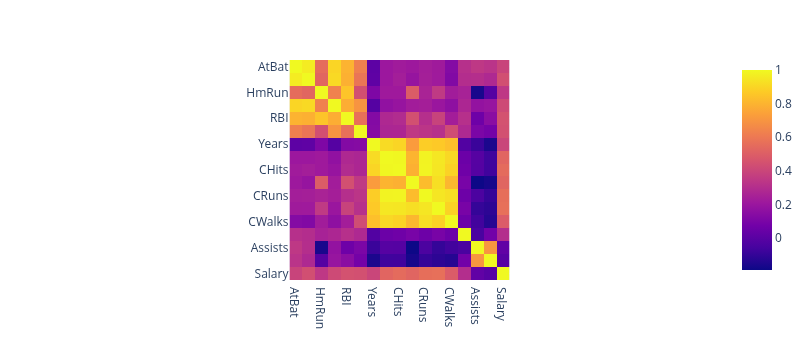

In [39]:
px.imshow(corr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id=":6px:i2yT#@tPaj$vnGs">corr</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="ADD0"><block type="variables_get" id="l$0?=r(2BKZ@(M^|1.Ut"><field name="VAR" id=":6px:i2yT#@tPaj$vnGs">corr</field></block></value></block></xml>

------------------
**QUESTION:**

What groups of variables are strongly correlated?

**ANSWER: (click here to edit)**

- Hitting/batting in 1986 (first 5) 
- Years and hitting/batting over career (6-12)
- Assists and errors

-------------------

**Note**: Although we have a lot of multicolinearity, that is not necessarily a problem for *penalized* methods like SVM, ridge, and lasso regression.
However, the value of the penalty parameter `C` becomes even more important with multicolinearity.

Do a histogram of the class label `Division` since we would like to see how our classes are balanced. 

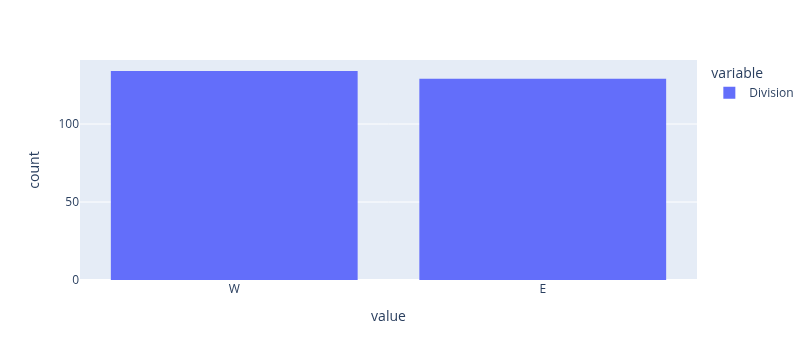

In [40]:
px.histogram(dataframe['Division'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="f`W@,!`/{w:Mj8xg1c]%" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="Yu4~2M*iRxM;xfa=Nh)("><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="cVIq(5`1S@(qm1=?:0pH"><field name="TEXT">Division</field></block></value></block></value></block></xml>

------------------
**QUESTION:**

What can you say about the balance between the classes and any possible problems that may result?

**ANSWER: (click here to edit)**

*The classes are almost perfectly balanced, so we don't expect any problems from imbalance.*

-------------------

## Prepare train/test sets

We need to separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe, so create `X` and `Y`.

In [41]:
X = dataframe.drop(columns='Division')
Y = dataframe['Division']

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="34" y="63"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Th`FuFw-?A%:op!Ci0Ct"><field name="CODE">columns='Division'</field></block></value></block></value><next><block type="variables_set" id="^}n-mp;Wz9VAmqK|?SBd"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="ISdeDNH@7oPb,+73ecS3"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="r}N;/dwZF=u9]I^K^/cr"><field name="TEXT">Division</field></block></value></block></value></block></next></block><block type="variables_get" id="RG`t=(:lm:3W|LvRHbY," x="84" y="260"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></xml>

1      W
2      W
3      E
4      E
5      W
      ..
317    E
318    E
319    W
320    E
321    W
Name: Division, Length: 263, dtype: object

Convert the nominal variables in `X` to dummies, storing the result in `X`. Keep all levels.

In [42]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="0" y="0"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="Kuddq@v3)!k#8DNkt8@H"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block><block type="variables_get" id="Crul).cZup-f]7~3m.;J" x="84" y="131"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,632,43,10,475.0,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,880,82,14,480.0,True,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,200,11,3,500.0,False,True,False,True
4,321,87,10,39,42,30,2,396,101,12,...,46,33,805,40,4,91.5,False,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,282,421,25,750.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,325,9,3,700.0,False,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,313,381,20,875.0,True,False,True,False
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,37,113,7,385.0,True,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,1314,131,12,960.0,True,False,True,False


Convert the nominal variable in `Y`, but drop the reference level.

In [43]:
Y = pd.get_dummies(Y,drop_first=True)

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="0" y="0"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><mutation items="2"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="(`fYa6Uc*d@N!L^7vJx."><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="I@(Yg-.%0/-)SDuOu+ya"><field name="CODE">drop_first=True</field></block></value></block></value></block><block type="variables_get" id="u2@5ML~?2]Fe|PEN(.mq" x="83" y="172"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></xml>

,W
1,True
2,True
3,False
4,False
5,True
...,...
317,False
318,False
319,True
320,False


------------------
**QUESTION:**

Why did we keep all levels of nominals for `X` but not `Y`?
What level/class is now `1` in `Y`?

**ANSWER: (click here to edit)**

*For `Y` we can only have one variable; if we don't drop the reference level, get_dummies will create two variables for us.
`W` for West is now `1`.*

-------------------

To split the data into train/test sets, import `model_selection`.

In [44]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual spliting of data, using `random_state=1`.

In [45]:
splits = model_selection.train_test_split(X,Y)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="0" y="0"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="2"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="C(PF=STH4MX|aI*0N9[."><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="^J|9MSE3W$,_/DEz)apM"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value></block></value></block></xml>

## Fit model

Import libraries for:

- SVM
- Metrics
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

In [46]:
import sklearn.svm as svm
import numpy as np
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-1?@LYu7gyhX}3NV$-Lv">svm</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id="tb8M1lM!u45Sg7*|pjG)" x="58" y="81"><field name="libraryName">sklearn.svm</field><field name="VAR" id="-1?@LYu7gyhX}3NV$-Lv">svm</field><next><block type="importAs" id="#n~K{o=Qop7Z[_YEjs`u"><field name="libraryName">numpy</field><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><next><block type="importAs" id="*}7RY7RRNo7VC5@m%Tk["><field name="libraryName">sklearn.preprocessing</field><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs" id="+dJM+p.?OUVo4DOrpHa*"><field name="libraryName">sklearn.pipeline</field><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><next><block type="importAs" id="{H02K*?VA0K3yr,FD/;h"><field name="libraryName">sklearn.metrics</field><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></next></block></next></block></next></block></next></block></xml>

Make a pipeline so we can scale and train in one step:

- Use `StandardScaler`
- Use `SVC` with `random_state=1`, `kernel="rbf"`, and `C=60`

In [47]:
nonlinearSVM = pipe.make_pipeline(pp.StandardScaler(),svm.SVC(random_state=1,kernel="rbf",C=60))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="-1?@LYu7gyhX}3NV$-Lv">svm</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="0" y="0"><field name="VAR" id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><mutation items="2"></mutation><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="ADD0"><block type="varCreateObject" id="8S#MB$v0Y6O^j3[E;kIm"><mutation items="1"></mutation><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="v*jW`.@Fj@hcr9VXdo/`"><mutation items="3"></mutation><field name="VAR" id="-1?@LYu7gyhX}3NV$-Lv">svm</field><field name="MEMBER">SVC</field><data>svm:SVC</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="bmTV.2xQK~P^ko4#BW|F"><field name="CODE">random_state=1</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="+krOG9M8Bb-T{k^U=Eor"><field name="CODE"> kernel="rbf"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="orZON:9:RyvZgJjl%os-"><field name="CODE">C=60</field></block></value></block></value></block></value></block></xml>

Call`fit` on the pipeline.

In [48]:
nonlinearSVM.fit(splits[0],np.ravel(splits[2]))

nonlinearSVM.score(splits[0],np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</field><field name="MEMBER">fit</field><data>nonlinearSVM:fit</data><value name="ADD0"><block type="lists_getIndex" id="c0blV6xH*vS*5o^gx5Z@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=";svDy7,d`VKn)2PB8`PO"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="meAQ.emX%eQav+@@hxbu"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="yP~.(Mc53P1t{n75V0Ps"><mutation items="1"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="^m_!AsUMc%iDdyTk==v#"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="xk^`vv*RbG9i(829,XR:"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="aF.UQK0W_1|bdcqcicPV"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="varDoMethod" id="[C=LDlZ,XFXgRt5%F8*x" x="108" y="182"><mutation items="2"></mutation><field name="VAR" id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</field><field name="MEMBER">score</field><data>nonlinearSVM:score</data><value name="ADD0"><block type="lists_getIndex" id="fS5)@qI:jJS8|3FWVcku"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Ua8ywRP-wsM#q0*EyhNs"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="e`nd2qnXw;y$k*FdM|66"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="@w=a-Mi|-M.,o{a|yejV"><mutation items="1"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="Dadgh}~{v$^|i8dWcD3a"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Y@p],}Q[TWoARfE5=SPK"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="ZKg?|fHNU@XCwxI=}]EM"><field name="NUM">3</field></block></value></block></value></block></value></block></xml>

0.9746192893401016

Get and save predictions.

In [49]:
predictions = nonlinearSVM.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="0" y="0"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><mutation items="1"></mutation><field name="VAR" id="i;_+IF8V]AzbjuX.BB85">nonlinearSVM</field><field name="MEMBER">predict</field><data>nonlinearSVM:predict</data><value name="ADD0"><block type="lists_getIndex" id="c0blV6xH*vS*5o^gx5Z@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=";svDy7,d`VKn)2PB8`PO"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="meAQ.emX%eQav+@@hxbu"><field name="NUM">2</field></block></value></block></value></block></value></block><block type="variables_get" id="C+q2@qhnu42kR)YXRkJf" x="-7" y="181"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></xml>

array([ True, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False])

## Evaluate the model

Get the accuracy.

In [50]:
print(metrics.accuracy_score(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="0" y="0"><value name="TEXT"><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><mutation items="2"></mutation><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="ADD0"><block type="lists_getIndex" id="c0blV6xH*vS*5o^gx5Z@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=";svDy7,d`VKn)2PB8`PO"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="meAQ.emX%eQav+@@hxbu"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="isI?a3jvj@DNmkci)f)4"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></xml>

0.5303030303030303


And get the recall and precision.

In [51]:
print(metrics.classification_report(splits[3],predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="0" y="0"><value name="TEXT"><block type="varDoMethod" id="(y`#h=AgNH6X+ahL$2L$"><mutation items="2"></mutation><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="ADD0"><block type="lists_getIndex" id="c0blV6xH*vS*5o^gx5Z@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=";svDy7,d`VKn)2PB8`PO"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="meAQ.emX%eQav+@@hxbu"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="P0d,,$3z!9(k@Sl]mh6X"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></xml>

              precision    recall  f1-score   support

       False       0.59      0.51      0.55        37
        True       0.47      0.55      0.51        29

    accuracy                           0.53        66
   macro avg       0.53      0.53      0.53        66
weighted avg       0.54      0.53      0.53        66



------------------
**QUESTION:**

Are you surprised by the classifier's ability to distinguish between East and West MLB divisions?
Why or why not?

**ANSWER: (click here to edit)**

*I would expect the divisions to be about the same in terms of batting ability, salary, etc, but these results suggest that there are differences the classifier can capitalize on. 
According to Wikipedia, East has historically sent more teams to championships, suggesting it is the stronger division.
Unfortunately, since this is a nonlinear SVM, it isn't easy to see what features are the most important.*

-------------------

**QUESTION:**

Try going back and changing `C` to different values to see how that effects the results. Try low values below 1 and large values up to 10,000.

What values did you try, and how did the accuracy change?

**ANSWER: (click here to edit)**

*Smaller C was much worse, worse than chance. Large C seems to plateau at a slightly worse accuracy than C=60, about .57*

-------------------